In [1]:
import os
import random
import pandas as pd
import contextily as cx
import geopandas as gpd
from matplotlib import colors
import matplotlib.pyplot as plt
from shapely.geometry import Point

ModuleNotFoundError: No module named 'contextily'

# Load and transform neighbourhoods

In [18]:
neighbourhoods = gpd.read_file('buurten-geojson_lnglat.php.json').to_crs("epsg:3857")
print(neighbourhoods.head())
print(len(neighbourhoods['Buurt_code']))

  Buurt_code                          Buurt Buurtcombinatie_code  \
0       F81d            Calandlaan/Lelylaan                  F81   
1       F81e                Osdorp Zuidoost                  F81   
2       F82a            Osdorp Midden Noord                  F82   
3       F82b             Osdorp Midden Zuid                  F82   
4       F82c  Zuidwestkwadrant Osdorp Noord                  F82   

  Stadsdeel_code    Opp_m2                                           geometry  
0              F  275360.0  POLYGON ((534422.723 6864602.193, 535341.554 6...  
1              F  519366.0  POLYGON ((536402.206 6865029.427, 536406.547 6...  
2              F  215541.0  POLYGON ((532848.220 6865976.022, 533813.249 6...  
3              F  258379.0  POLYGON ((533030.339 6865433.535, 533990.358 6...  
4              F  240774.0  POLYGON ((533243.627 6864790.290, 534250.957 6...  
481


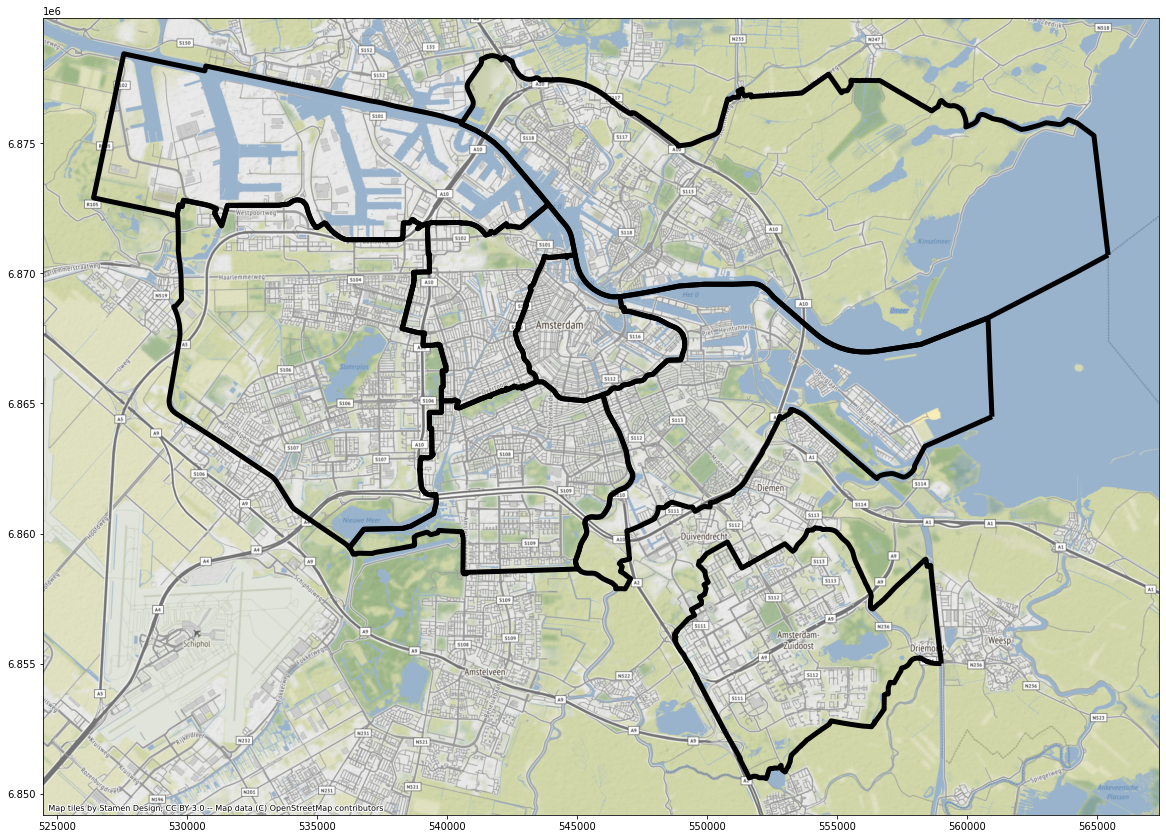

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

mapping_names = ['stadsdelen', '22gebieden', '25praktijkgebieden', 
                 'buurten', 'wijken', 'pc4']#, 'pc6']
# mapping_names = ['wijken', 'buurten']
mapping_names = ['stadsdelen']
coloring = ['black', 'blue', 'red', 'orange', 'purple', 'yellow']
widths = [10, 5, 4, 3, 2, 1, 0.5]
widths = [5, 1]

for index, mapping in enumerate(mapping_names):
    layout = gpd.read_file(mapping + '-geojson_lnglat.php.json').to_crs("epsg:3857")
    layout.geometry.boundary.plot(color=None, edgecolor=coloring[index], 
                                  linewidth=widths[index], ax=ax)

cx.add_basemap(ax)

# neighbourhoods.geometry.boundary.plot(
#     color=None, edgecolor='k', 
#     linewidth=1, ax=ax, zorder=1)

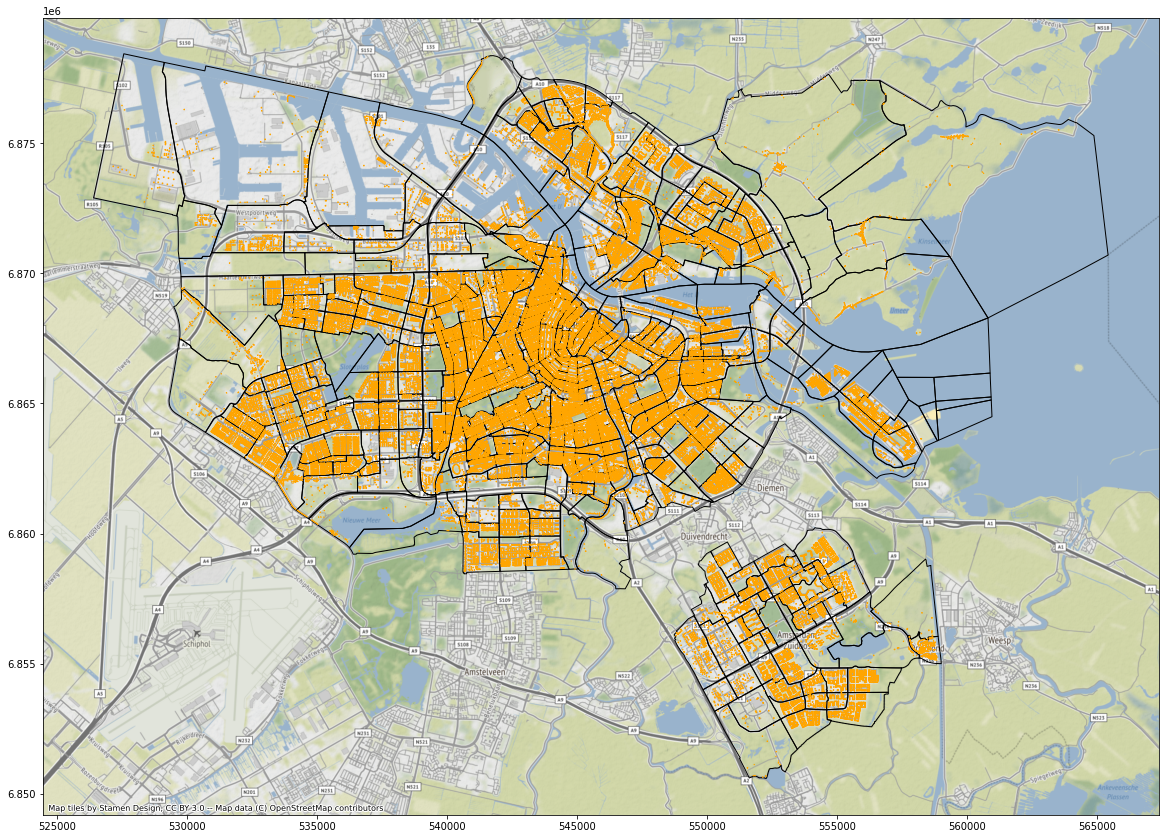

In [17]:
# Import pc6 to avoid people living in water, etc.
pc6 = gpd.read_file('pc6-geojson_lnglat.php.json').to_crs("epsg:3857")

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
neighbourhoods.geometry.boundary.plot(
    color=None, edgecolor='k', 
    linewidth=1, ax=ax, zorder=1)

pc6.geometry.boundary.plot(
    color=None, edgecolor='orange', 
    linewidth=1, ax=ax, zorder=2)

cx.add_basemap(ax)

In [6]:
agents = gpd.GeoDataFrame(neighbourhoods[['Buurt_code', 'geometry']])
agents['object'] = 'Neighbourhood'

import shapely
xs, ys, names = [], [], []
for i, row in neighbourhoods.iterrows():
    if row.geometry.type == 'Polygon':
        x, y = row.geometry.exterior.coords.xy
    elif row.geometry.type == 'MultiPolygon':
        x, y = row.geometry.convex_hull.exterior.coords.xy
        
    xs.append(list(x))
    ys.append(list(y))
    names.append(row.Buurt_code)
    
agents['x'] = xs
agents['y'] = ys  
    
# Shape and size follow from the polygons but are needed for schools and households
agents['shape'] = None
agents['size'] = None
agents['color'] = 'black'
agents

Buurt_code                                           geometry  \
0         F81d  POLYGON ((534422.723 6864602.193, 535341.554 6...   
1         F81e  POLYGON ((536402.206 6865029.427, 536406.547 6...   
2         F82a  POLYGON ((532848.220 6865976.022, 533813.249 6...   
3         F82b  POLYGON ((533030.339 6865433.535, 533990.358 6...   
4         F82c  POLYGON ((533243.627 6864790.290, 534250.957 6...   
..         ...                                                ...   
476       T98a  POLYGON ((557703.858 6856056.977, 557776.550 6...   
477       T98b  POLYGON ((556383.943 6857106.310, 556475.782 6...   
478       T94n  POLYGON ((553295.607 6858004.261, 553349.930 6...   
479       T96d  POLYGON ((553568.896 6854304.751, 553615.427 6...   
480       T96e  POLYGON ((553721.515 6853753.220, 553928.569 6...   

            object                                                  x  \
0    Neighbourhood  [534422.7227198385, 535341.5537968462, 535321....   
1    Neighbourhood  [536402.2059051245, 536406.5473652655, 536344....   
2    Neighbourhood  [532848.2198420585, 533813.2485077453, 533990....   
3    Neighbourhood  [533030.3385289963, 533990.3578175975, 534128....   
4    Neighbourhood  [533243.6266733562, 534250.9567455444, 534422....   
..             ...                                                ...   
476  Neighbourhood  [557703.8583853623, 557776.5500128502, 557786....   
477  Neighbourhood  [556383.9431830264, 556475.7817629308, 556559....   
478  Neighbourhood  [553295.6065499486, 553349.9304614556, 553366....   
479  Neighbourhood  [553568.8958998461, 553615.4274469977, 553710....   
480  Neighbourhood  [553721.5149217236, 553928.5691745991, 553945....   

                                                     y shape  size  color  
0    [6864602.192662843, 6864906.029892715, 6864968...  None  None  black  
1    [6865029.4271691395, 6864806.329190416, 686478...  None  None  black  
2    [6865976.021880856, 6866289.937468959, 6865751...  None  None  black  
3    [6865433.53458418, 6865751.439374359, 6865331....  None  None  black  
4    [6864790.289704545, 6865122.021935598, 6864602...  None  None  black  
..                                                 ...   ...   ...    ...  
476  [6856056.976741404, 6856083.558897027, 6856066...  None  None  black  
477  [6857106.310183652, 6857196.44670503, 6857274....  None  None  black  
478  [6858004.260612194, 6858034.673582976, 6858040...  None  None  black  
479  [6854304.750590744, 6854326.59418257, 6854384....  None  None  black  
480  [6853753.219511719, 6853810.009088109, 6853757...  None  None  black  

[481 rows x 8 columns]

# Load school locations

<AxesSubplot:>

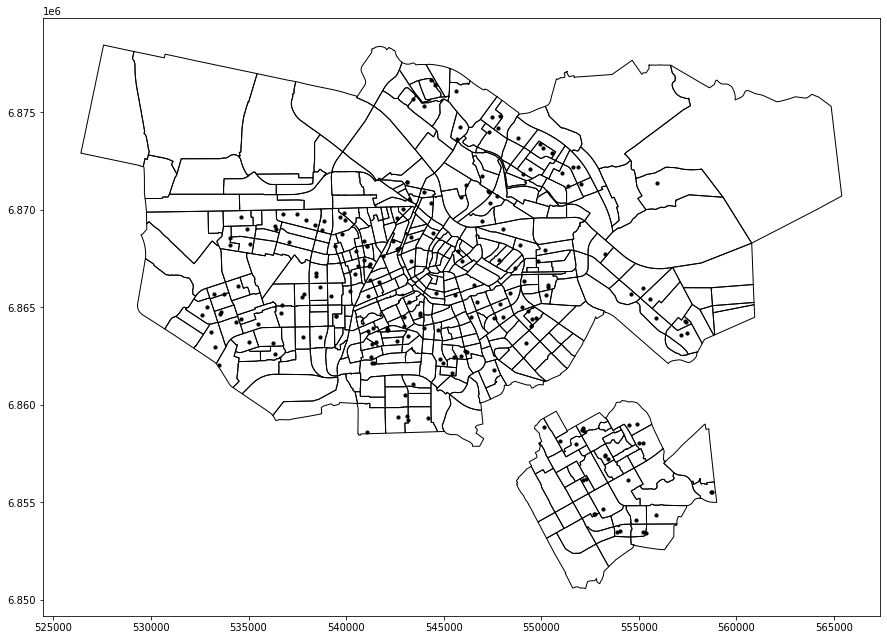

In [7]:
schools = gpd.read_file('school_locations.geojson')
schools['Buurt_code'] = None
schools['object'] = 'School'
schools['shape'] = 'circle'
schools['size'] = 5
schools['color'] = 'black'
schools.drop(columns='address', inplace=True)
schools = schools.to_crs('EPSG:3857')
schools = schools[~schools.geometry.isna()]
schools['x'] = [point.xy[0][0] for point in schools.geometry]
schools['y'] = [point.xy[1][0] for point in schools.geometry]
agents = agents.append(schools, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
neighbourhoods.geometry.boundary.plot(
    color=None, edgecolor='k', 
    linewidth=1, ax=ax, zorder=1)
schools.plot(ax=ax, color='black', markersize=10)

In [7]:
agents

Buurt_code                                           geometry  \
0         F81d  POLYGON ((534422.723 6864602.193, 535341.554 6...   
1         F81e  POLYGON ((536402.206 6865029.427, 536406.547 6...   
2         F82a  POLYGON ((532848.220 6865976.022, 533813.249 6...   
3         F82b  POLYGON ((533030.339 6865433.535, 533990.358 6...   
4         F82c  POLYGON ((533243.627 6864790.290, 534250.957 6...   
..         ...                                                ...   
678       None                     POINT (557384.906 6864272.578)   
679       None                     POINT (542980.420 6864501.038)   
680       None                     POINT (541519.530 6863235.668)   
681       None                     POINT (541324.642 6862153.595)   
682       None                     POINT (543793.263 6864629.587)   

            object                                                  x  \
0    Neighbourhood  [534422.7227198385, 535341.5537968462, 535321....   
1    Neighbourhood  [536402.2059051245, 536406.5473652655, 536344....   
2    Neighbourhood  [532848.2198420585, 533813.2485077453, 533990....   
3    Neighbourhood  [533030.3385289963, 533990.3578175975, 534128....   
4    Neighbourhood  [533243.6266733562, 534250.9567455444, 534422....   
..             ...                                                ...   
678         School                                       557384.90578   
679         School                                      542980.419707   
680         School                                      541519.530445   
681         School                                      541324.642469   
682         School                                      543793.263496   

                                                     y   shape  size  color  
0    [6864602.1926628435, 6864906.029892715, 686496...    None  None  black  
1    [6865029.42716914, 6864806.329190415, 6864782....    None  None  black  
2    [6865976.021880856, 6866289.937468959, 6865751...    None  None  black  
3    [6865433.534584181, 6865751.439374358, 6865331...    None  None  black  
4    [6864790.289704546, 6865122.021935598, 6864602...    None  None  black  
..                                                 ...     ...   ...    ...  
678                                     6864272.577771  circle     5  black  
679                                      6864501.03764  circle     5  black  
680                                     6863235.668297  circle     5  black  
681                                     6862153.595468  circle     5  black  
682                                     6864629.586755  circle     5  black  

[683 rows x 8 columns]

In [8]:
def generate_random(number, polygon, pc6):
    """
    Generates random points within a polygon object
    
    Args:
        number (int): the number of points to sample
        polygon: polygon object from a GeoDataFrame
        
    Returns:
        list of
    """
    index = 0
    points = [0]*number
    minx, miny, maxx, maxy = polygon.bounds
    
    valid_pc6 = []
    for pc6_area in pc6.geometry:
        if polygon.contains(pc6_area.centroid):
            valid_pc6.append(pc6_area)
            
    valid_pc6 = gpd.GeoSeries(valid_pc6).buffer(0)
    
    while index < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        
        if valid_pc6.contains(pnt).any():
            points[index] = pnt
            index += 1
            
    return points

# Create households

In [9]:
groups = pd.read_excel('selection_bbga.xlsx')
print(groups[['BEV4_12', 'OLLBAO', 'IHHINK_GEM']])

     BEV4_12  OLLBAO  IHHINK_GEM
0       22.0     NaN     35600.0
1        9.0     NaN     33000.0
2       57.0     NaN     32900.0
3        8.0     NaN     43000.0
4       20.0     NaN     35100.0
..       ...     ...         ...
477    273.0   395.0     49600.0
478    271.0     NaN     36000.0
479    148.0   255.0     43400.0
480     18.0     NaN         NaN
481      NaN     NaN         NaN

[482 rows x 3 columns]


In [10]:
print(groups['BEV4_12'].sum())

72821.0


In [11]:
perc_of_actual = 0.03

for index, agent in agents.iterrows():
    
    if agent.object=='Neighbourhood':
        area = agent.Buurt_code
        stats = groups[groups['Buurt_code'].str.contains(area)]
        
        if stats['BEV4_12'].values >= 10:
            total = int(stats['BEV4_12']*perc_of_actual)
        else: 
            continue
        
        # share is based on people until 17, actual number is based on 4-12 year olds
        share = ((stats['BEV17AUTO_P'] + stats['BEV17W_P']) / 100).values[0]
        n_group = int(total*share)
        locations = generate_random(total, agent.geometry, pc6)
        households = gpd.GeoDataFrame(geometry=locations) 
        households['object'] = 'Household'
        households['group'] = [0]*n_group + [1]*(total-n_group)
        households['shape'] = 'circle'
        households['size'] = 3
        households['color'] = ['red']*n_group + ['blue']*(total-n_group)
        households['x'] = [point.xy[0][0] for point in households.geometry]
        households['y'] = [point.xy[1][0] for point in households.geometry]
        agents = agents.append(households, ignore_index=True)
        
        if agent.geometry.type=='MultiPolygon':
            print("The Bokeh visualisation cannot work with multipolygons yet.")
            break

<module 'matplotlib.colors' from 'C:\\Users\\edignum\\.virtualenvs\\compassproject-OUBZ_QZN\\lib\\site-packages\\matplotlib\\colors.py'>


<AxesSubplot:>

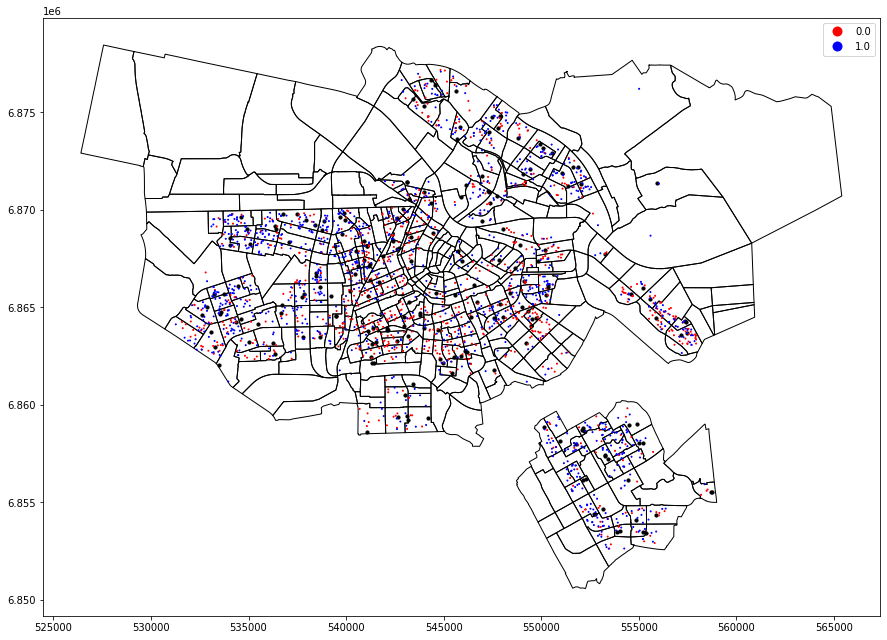

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
neighbourhoods.geometry.boundary.plot(
    color=None, edgecolor='k', 
    linewidth=1, ax=ax, zorder=1)
schools.plot(ax=ax, color='black', markersize=10)

print(colors)
cmap = colors.ListedColormap(['red', 'blue'])

agents[agents.object=='Household'].plot(
    ax=ax, markersize=1, categorical=True, column='group',
    cmap=cmap, legend=True)

In [13]:
# Create the specific objects
import os
import sys
import numpy as np
sys.path.insert(0, "../..")

from parameters import FLAGS
from model import CompassModel
from agents_household import Household
from agents_spatial import Neighbourhood, School

FLAGS.case = 'lattice'
model = CompassModel(vars(FLAGS), export=False)
model.closest_neighbourhoods = {}

objects=np.zeros(agents.shape[0], dtype='object')
nhood_objects, school_objects, household_objects = [], [], []
for index, agent in agents.iterrows():
    
    if agent.object=='Neighbourhood':
        nhood_objects.append(Neighbourhood(index, 
                                           (agent.x, agent.y),
                                            agent.geometry,
                                            model, model.params))
    elif agent.object=='School':
        school_objects.append(School(index, 
                                    (agent.x, agent.y),
                                    model, model.params))
    elif agent.object=='Household':
        
        pos = (agent.x, agent.y)
        for neighbourhood in nhood_objects:
            if neighbourhood.shape.contains(Point(pos)):
                model.closest_neighbourhoods[str(pos)] = neighbourhood
                
                household_objects.append(Household(index, 
                                           (agent.x, agent.y), 
                                           model,
                                           model.params,
                                            category=int(agent.group),
                                            nhood=neighbourhood))
                break

amsterdam_model = {}
amsterdam_model['neighbourhoods'] = nhood_objects
amsterdam_model['schools'] = school_objects
amsterdam_model['households'] = household_objects
amsterdam_model['neighbourhoods_gpd'] = agents[agents.object=="Neighbourhood"]
amsterdam_model['agents'] = agents

 Model initialised:
            NR AGENTS:  Households: 4381
            Neighbourhoods: 16
            Schools: 16
            In scheduler: 4413


In [14]:
amsterdam_model['neighbourhoods_gpd'].total_bounds

array([ 526404.04583953, 6850579.09986468,  565409.95013553,
       6878444.52261128])

In [15]:
agents.describe()

group
count  1988.000000
mean      0.560362
std       0.496468
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

# Calculate distances to schools

In [16]:
def calculate_distance(point, school_objects, school_geometries):
    """
    Calculates the distance between Point geometries.
    """
    # Calculate the distances to all schools
    distances = school_geometries.distance(point)
    
#     # Convert into kilometers
#     distances_km = distances / 1000.
    
    school_locations = [str((loc.x, loc.y)) for loc in school_geometries]
    
    distance_dict = dict(zip(school_locations, distances))
    
    index_closest = np.argmin(distances)
    index_furthest = np.argmax(distances)
    closest_school = school_objects[index_closest]
    furthest_school = school_objects[index_furthest]
    min_dist = distances[index_closest]
    max_dist = distances[index_furthest]
    
    distance_dict['closest_school'] = (closest_school, min_dist)
    distance_dict['furthest_school'] = (furthest_school, max_dist)
    
    return distance_dict

In [17]:
from tqdm import tqdm
school_geometries = gpd.GeoSeries([Point(school.pos[0], school.pos[1]) 
                                      for school in school_objects])

distances = {str(household.pos):calculate_distance(Point(household.pos[0], household.pos[1]), 
                              school_objects, 
                              school_geometries) \
               for household in tqdm(household_objects)}

100%|██████████████████████████████████████████████████████████████████████████████| 1988/1988 [00:22<00:00, 88.48it/s]


In [18]:
amsterdam_model['distances'] = distances
amsterdam_model['closest_schools'] = {pos:distances[pos]['closest_school'] for pos in distances.keys()}
amsterdam_model['furthest_schools'] = {pos:distances[pos]['furthest_school'] for pos in distances.keys()}

In [19]:
import pickle
with open("agents_3p.pickle", "wb") as f:
    pickle.dump(amsterdam_model, f, protocol=pickle.HIGHEST_PROTOCOL)

# Bokeh visualisation

In [20]:
neighbourhood_data = agents[agents.object=="Neighbourhood"].drop('geometry', axis=1)
school_data = agents[agents.object=="School"].drop('geometry', axis=1)
household_data = agents[agents.object=="Household"].drop('geometry', axis=1)

In [21]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Amsterdam", tools=TOOLS,
    plot_width=900, plot_height=900,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("(Long, Lat)", "($x, $y)")
    ],
    x_axis_type="mercator", y_axis_type="mercator")
# p.grid.grid_line_color = None
# p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=neighbourhood_data,
          fill_alpha=0.7, line_color="white", line_width=0.5)

p.circle(x="x", y="y", source=household_data, 
        alpha=0.8, fill_color='color', size='size',
        nonselection_fill_alpha=0.2, selection_fill_alpha=1)

p.circle(x="x", y="y", size='size', source=school_data, fill_color='yellow')

output_notebook()
show(p)

Loading BokehJS ...